In [ ]:
# Scope of the Notebook

# 1. Download the breast tumor image dataset from a public web source.
#    - Use a well-known dataset such as BreakHis or Breast Histopathology Images.
#    - Organize the data into train/test splits.

# 2. Develop a CNN-Transformer hybrid model (e.g., BEiT, BEFUNet-based).
#    - Implement the model architecture using PyTorch or TensorFlow.
#    - Combine convolutional layers for feature extraction and transformer blocks for global context.

# 3. Train the model on the training dataset.
#    - Set up data loaders, loss function, optimizer, and training loop.
#    - Monitor training and validation accuracy.

# 4. Test the model on the test dataset.
#    - Evaluate accuracy, precision, recall, and F1-score.

# 5. Plot the confusion matrix for test predictions.
#    - Visualize model performance across classes.

# 6. Summarize findings and discuss potential improvements.

# Import libraries 


In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image

## Dataset Overview

The image dataset for this study contains three classes: **malignant**, **normal**, and **benign**. Each image is accompanied by a corresponding mask that highlights the tumor region.

#### Store images

In [6]:
dataset_path = r"Dataset_BUSI_with_GT"
classes = ['malignant', 'normal', 'benign']

images = []
masks = []
labels = []

for cls in classes:
    cls_path = os.path.join(dataset_path, cls)
    for fname in os.listdir(cls_path):
        if 'mask' not in fname:
            img_path = os.path.join(cls_path, fname)
            mask_path = os.path.join(cls_path, fname.split('.')[0] + '_mask.png')
            if os.path.exists(mask_path):
                images.append(Image.open(img_path))
                masks.append(Image.open(mask_path))
                labels.append(cls)


#### Show Dataset examples

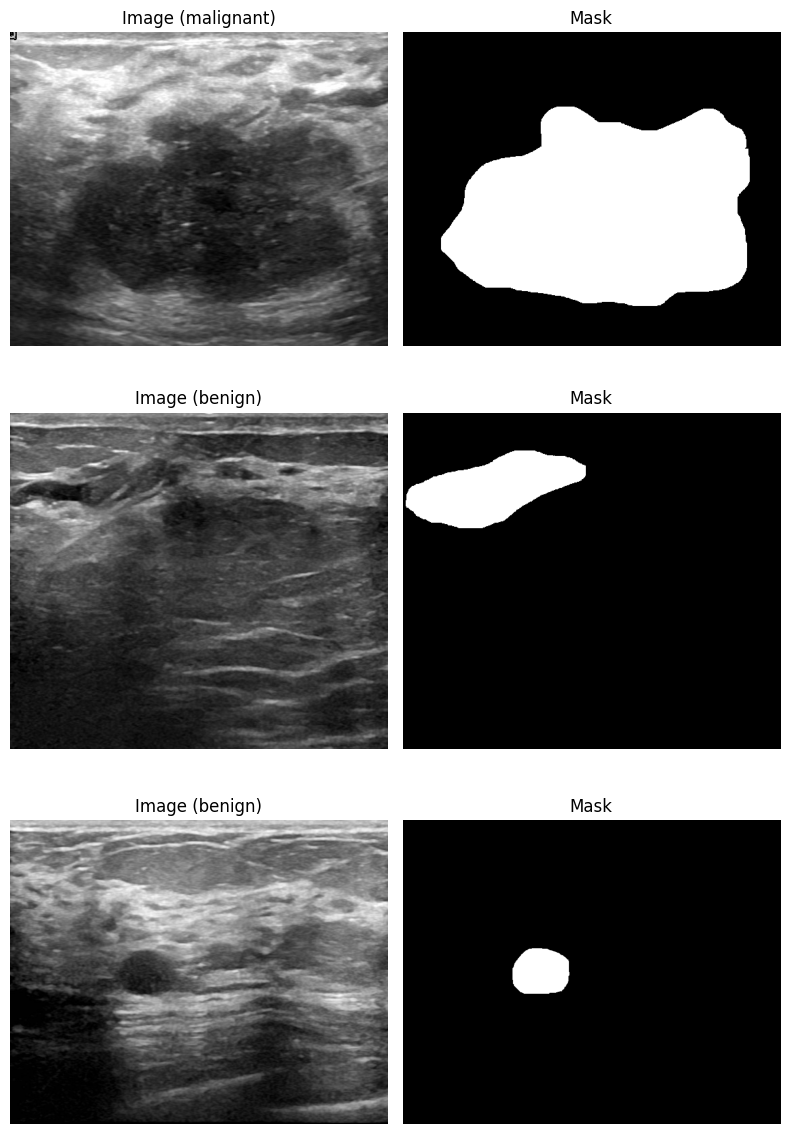

In [23]:
import random

fig, axes = plt.subplots(3, 2, figsize=(8, 12))

for i in range(3):
    n = random.randint(0, len(images) - 1)
    axes[i, 0].imshow(images[n], cmap='gray')
    axes[i, 0].set_title(f"Image ({labels[n]})")
    axes[i, 0].axis('off')
    axes[i, 1].imshow(masks[n], cmap='gray')
    axes[i, 1].set_title("Mask")
    axes[i, 1].axis('off')
plt.tight_layout()
plt.show()

## CNN-Transformer hybrid model

